In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the file path
file_path = "/kaggle/input/undergrad/Undergraduate.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Artificial Neural Network (ANN) Classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_classifier.fit(X_train_scaled, y_train)
ann_predictions = ann_classifier.predict(X_test_scaled)

# Machine Learning Classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Define K-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, classifier in classifiers.items():
    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=kfold)
    
    # Evaluate the classifier
    accuracy_mean = cv_scores.mean()
    accuracy_std = cv_scores.std()
    
    print(f"Classifier: {name}")
    print(f"Cross-Validation Accuracy Mean: {accuracy_mean:.2f}")
    print(f"Cross-Validation Accuracy Standard Deviation: {accuracy_std:.2f}")
    print('='*40)





Classifier: Random Forest
Cross-Validation Accuracy Mean: 0.81
Cross-Validation Accuracy Standard Deviation: 0.05
Classifier: SVM
Cross-Validation Accuracy Mean: 0.77
Cross-Validation Accuracy Standard Deviation: 0.06


In [2]:
# Assuming the last column is the target variable
target_column = df.columns[-1]

# Standardize the target column values
df[target_column] = df[target_column].str.strip()

# Print the distribution of the standardized target column
print(df[target_column].value_counts())


Public University     369
Private University    226
Name: Name of your current institution? , dtype: int64


# Binary Classification

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Hyperparameter tuning for RandomForestClassifier
param_grid_rf = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline for preprocessing and RandomForestClassifier
pipeline_rf = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_encoded, y)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters for RandomForestClassifier: {best_params_rf}")

# Evaluate the RandomForestClassifier with the best parameters using K-fold cross-validation
best_rf_classifier = grid_search_rf.best_estimator_

# Define K-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores_rf = cross_val_score(best_rf_classifier, X_encoded, y, cv=kfold)
cv_predictions_rf = cross_val_predict(best_rf_classifier, X_encoded, y, cv=kfold)

# Calculate accuracy
cv_accuracy_rf = cv_scores_rf.mean()
print(f"Random Forest Classifier Cross-Validation Accuracy: {cv_accuracy_rf:.2f}")

# Generate classification report
cv_report_rf = classification_report(y, cv_predictions_rf)
print("Random Forest Classifier Cross-Validation Classification Report:")
print(cv_report_rf)



Best Parameters for RandomForestClassifier: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 50}
Random Forest Classifier Cross-Validation Accuracy: 0.83
Random Forest Classifier Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       226
           1       0.84      0.89      0.86       369

    accuracy                           0.83       595
   macro avg       0.82      0.81      0.81       595
weighted avg       0.82      0.83      0.82       595



In [4]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y, cv_predictions_rf)
print("Confusion Matrix for RandomForestClassifier:")
print(conf_matrix_rf)


Confusion Matrix for RandomForestClassifier:
[[163  63]
 [ 41 328]]


# Without encoding first two columns


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Separate the columns to be encoded and the columns to be excluded
columns_to_encode = X.drop(columns=[X.columns[0], X.columns[1]]).columns
columns_to_exclude = [X.columns[0], X.columns[1]]

# One-hot encode columns_to_encode
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), columns_to_encode),
        ('passthrough', 'passthrough', columns_to_exclude)
    ],
    remainder='drop'
)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}


# Create a pipeline for preprocessing and RandomForestClassifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters for RandomForestClassifier: {best_params_rf}")

# Evaluate the RandomForestClassifier with the best parameters
best_rf_classifier = grid_search_rf.best_estimator_
best_rf_predictions = best_rf_classifier.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
best_rf_report = classification_report(y_test, best_rf_predictions)

print("Random Forest Classifier:")
print(f"Accuracy: {best_rf_accuracy:.2f}")
print(f"Classification Report:\n{best_rf_report}\n{'='*40}")


Best Parameters for RandomForestClassifier: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Random Forest Classifier:
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        39
           1       0.88      0.88      0.88        80

    accuracy                           0.83       119
   macro avg       0.81      0.81      0.81       119
weighted avg       0.83      0.83      0.83       119



In [7]:
# Get feature importances
feature_importances = best_rf_classifier[-1].feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(list(zip(X_encoded.columns, feature_importances)), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features and their importances
print("Top Feature Importances:")
print(feature_importance_df.head(5))  # You can adjust the number to display more or fewer top features


Top Feature Importances:
                                              Feature  Importance
32  Were there any external factors that may have ...    0.307809
31  Were there any external factors that may have ...    0.251323
11  Were you involved in politics while preparing ...    0.040955
17  Did you stay with your family while preparing ...    0.035342
20  The average duration of study in a single day ...    0.031291


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Hyperparameter tuning for SVM
param_grid_svm = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

# Hyperparameter tuning for MLPClassifier
param_grid_mlp = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100, 50), (100, 50, 20)],
    'mlpclassifier__max_iter': [200, 500, 1000],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01]
}

# Hyperparameter tuning for DecisionTreeClassifier
param_grid_dt = {
    'decisiontreeclassifier__max_depth': [None, 5, 10, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

# Hyperparameter tuning for LogisticRegression
param_grid_lr = {
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__max_iter': [50, 100, 200]
}

# Hyperparameter tuning for GaussianNB (No hyperparameters to tune)

# Hyperparameter tuning for KNeighborsClassifier
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

# Hyperparameter tuning for AdaBoostClassifier
param_grid_adaboost = {
    'adaboostclassifier__n_estimators': [50, 100, 200],
    'adaboostclassifier__learning_rate': [0.1, 0.5, 1]
}

# Hyperparameter tuning for GradientBoostingClassifier
param_grid_gb = {
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.5],
    'gradientboostingclassifier__max_depth': [3, 5, 10]
}

# Create pipelines for each classifier

pipeline_svm = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SVC(random_state=42)
)

pipeline_mlp = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    MLPClassifier(random_state=42)
)

pipeline_dt = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

pipeline_lr = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(random_state=42)
)

pipeline_nb = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    GaussianNB()
)

pipeline_knn = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    KNeighborsClassifier()
)

pipeline_adaboost = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    AdaBoostClassifier(random_state=42)
)

pipeline_gb = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)

# Create dictionaries for classifiers and their respective hyperparameter grids
classifiers = {
    'SVM': (pipeline_svm, param_grid_svm),
    'MLPClassifier': (pipeline_mlp, param_grid_mlp),
    'Decision Tree': (pipeline_dt, param_grid_dt),
    'Logistic Regression': (pipeline_lr, param_grid_lr),
    'Naive Bayes': (pipeline_nb, {}),
    'K-Nearest Neighbors': (pipeline_knn, param_grid_knn),
    'AdaBoost': (pipeline_adaboost, param_grid_adaboost),
    'Gradient Boosting': (pipeline_gb, param_grid_gb)
}

# Loop through classifiers
for name, (pipeline, param_grid) in classifiers.items():
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for {name}: {best_params}")

    # Evaluate the classifier with the best parameters
    best_classifier = grid_search.best_estimator_
    best_predictions = best_classifier.predict(X_test)
    best_accuracy = accuracy_score(y_test, best_predictions)
    # Convert numeric labels back to class names
    class_names = le.classes_
    y_test_names = le.inverse_transform(y_test)
    best_predictions_names = le.inverse_transform(best_predictions)

    best_report = classification_report(y_test_names, best_predictions_names, target_names=class_names)

    print(f"{name} Classifier:")
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {best_accuracy:.2f}")
    print(f"Classification Report:\n{best_report}\n{'='*40}")

Best Parameters for SVM: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
SVM Classifier:
Best Parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Accuracy: 0.84
Classification Report:
                    precision    recall  f1-score   support

Private University       0.78      0.72      0.75        39
 Public University       0.87      0.90      0.88        80

          accuracy                           0.84       119
         macro avg       0.82      0.81      0.82       119
      weighted avg       0.84      0.84      0.84       119



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters for MLPClassifier: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 200}
MLPClassifier Classifier:
Best Parameters: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 200}
Accuracy: 0.82
Classification Report:
                    precision    recall  f1-score   support

Private University       0.70      0.77      0.73        39
 Public University       0.88      0.84      0.86        80

          accuracy                           0.82       119
         macro avg       0.79      0.80      0.80       119
      weighted avg       0.82      0.82      0.82       119

Best Parameters for Decision Tree: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__min_samples_split': 10}
Decision Tree Classifier:
Best Parameters: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 4, 

# cross validation

In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns),
        ('passthrough', 'passthrough', [X.columns[0], X.columns[1]])
    ],
    remainder='drop'
)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Hyperparameter tuning for each classifier
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100, 50), (100, 50, 20)],
        'max_iter': [200, 500, 1000],
        'alpha': [0.0001, 0.001, 0.01]
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'max_iter': [50, 100, 200]
    },
    'GaussianNB': {},  # No hyperparameters to tune
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.5, 1]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 10]
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 10]
    },
    'LGBMClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 10]
    },
    'CatBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 10]
    },
    'ExtraTreesClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'BaggingClassifier': {
        'n_estimators': [50, 100, 200],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0]
    }
}

# Create pipelines for each classifier
classifiers = {
    'RandomForestClassifier': make_pipeline(preprocessor, RandomForestClassifier(random_state=42)),
    'SVC': make_pipeline(preprocessor, StandardScaler(), SVC(random_state=42)),
    'MLPClassifier': make_pipeline(preprocessor, StandardScaler(), MLPClassifier(random_state=42)),
    'DecisionTreeClassifier': make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42)),
    'LogisticRegression': make_pipeline(preprocessor, StandardScaler(), LogisticRegression(random_state=42)),
    'GaussianNB': make_pipeline(preprocessor, GaussianNB()),
    'KNeighborsClassifier': make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier()),
    'AdaBoostClassifier': make_pipeline(preprocessor, AdaBoostClassifier(random_state=42)),
    'GradientBoostingClassifier': make_pipeline(preprocessor, GradientBoostingClassifier(random_state=42)),
    'XGBClassifier': make_pipeline(preprocessor, XGBClassifier(random_state=42)),
    'LGBMClassifier': make_pipeline(preprocessor, LGBMClassifier(random_state=42)),
    'CatBoostClassifier': make_pipeline(preprocessor, CatBoostClassifier(random_state=42, verbose=False)),
    'ExtraTreesClassifier': make_pipeline(preprocessor, ExtraTreesClassifier(random_state=42)),
    'BaggingClassifier': make_pipeline(preprocessor, BaggingClassifier(random_state=42))
}

# Perform K-fold cross-validation and generate classification report
def kfold_cross_validation(X, y, classifiers, k=10):
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for name, classifier in classifiers.items():
        print(f"Evaluating {name}...")
        scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
        print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
        predictions = cross_val_predict(classifier, X, y, cv=kf)
        report = classification_report(y, predictions)
        print(f"Classification Report:\n{report}\n{'='*40}\n")

# Perform K-fold cross-validation
kfold_cross_validation(X, y, classifiers)



Evaluating RandomForestClassifier...
Accuracy: 0.81 (+/- 0.10)
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       226
           1       0.83      0.87      0.85       369

    accuracy                           0.81       595
   macro avg       0.80      0.79      0.79       595
weighted avg       0.81      0.81      0.81       595


Evaluating SVC...
Accuracy: 0.78 (+/- 0.11)
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.56      0.65       226
           1       0.77      0.91      0.83       369

    accuracy                           0.78       595
   macro avg       0.78      0.73      0.74       595
weighted avg       0.78      0.78      0.77       595


Evaluating MLPClassifier...


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy: 0.77 (+/- 0.14)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       226
           1       0.80      0.84      0.82       369

    accuracy                           0.77       595
   macro avg       0.76      0.75      0.75       595
weighted avg       0.77      0.77      0.77       595


Evaluating DecisionTreeClassifier...
Accuracy: 0.73 (+/- 0.11)
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       226
           1       0.78      0.78      0.78       369

    accuracy                           0.73       595
   macro avg       0.71      0.71      0.71       595
weighted avg       0.73      0.73      0.73       595


Evaluating LogisticRegression...
Accuracy: 0.79 (+/- 0.11)
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       226
           1       0.79      0.90      0.84 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.backends.backend_pdf import PdfPages

# Perform K-fold cross-validation and generate classification report along with confusion matrix
def kfold_cross_validation(X, y, classifiers, k=10):
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for name, classifier in classifiers.items():
        print(f"Evaluating {name}...")
        # Perform cross-validation
        scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
        print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
        predictions = cross_val_predict(classifier, X, y, cv=kf)
        report = classification_report(y, predictions)
        print(f"Classification Report:\n{report}\n{'='*40}\n")
        # Generate confusion matrix
        conf_mat = confusion_matrix(y, predictions)
        # Plot confusion matrix using Seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='inferno', xticklabels=le.classes_, yticklabels=le.classes_)
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        # Save plot to PDF file with bbox_inches='tight'
        with PdfPages(f'{name}_confusion_matrix.pdf') as pdf:
            pdf.savefig(bbox_inches='tight')
            plt.close()

# Perform K-fold cross-validation with confusion matrix visualization and save plots to PDF
kfold_cross_validation(X, y, classifiers)


Evaluating RandomForestClassifier...
Accuracy: 0.81 (+/- 0.10)
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       226
           1       0.83      0.87      0.85       369

    accuracy                           0.81       595
   macro avg       0.80      0.79      0.79       595
weighted avg       0.81      0.81      0.81       595


Evaluating SVC...
Accuracy: 0.78 (+/- 0.11)
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.56      0.65       226
           1       0.77      0.91      0.83       369

    accuracy                           0.78       595
   macro avg       0.78      0.73      0.74       595
weighted avg       0.78      0.78      0.77       595


Evaluating MLPClassifier...


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy: 0.77 (+/- 0.14)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       226
           1       0.80      0.84      0.82       369

    accuracy                           0.77       595
   macro avg       0.76      0.75      0.75       595
weighted avg       0.77      0.77      0.77       595


Evaluating DecisionTreeClassifier...
Accuracy: 0.73 (+/- 0.11)
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       226
           1       0.78      0.78      0.78       369

    accuracy                           0.73       595
   macro avg       0.71      0.71      0.71       595
weighted avg       0.73      0.73      0.73       595


Evaluating LogisticRegression...
Accuracy: 0.79 (+/- 0.11)
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       226
           1       0.79      0.90      0.84 

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


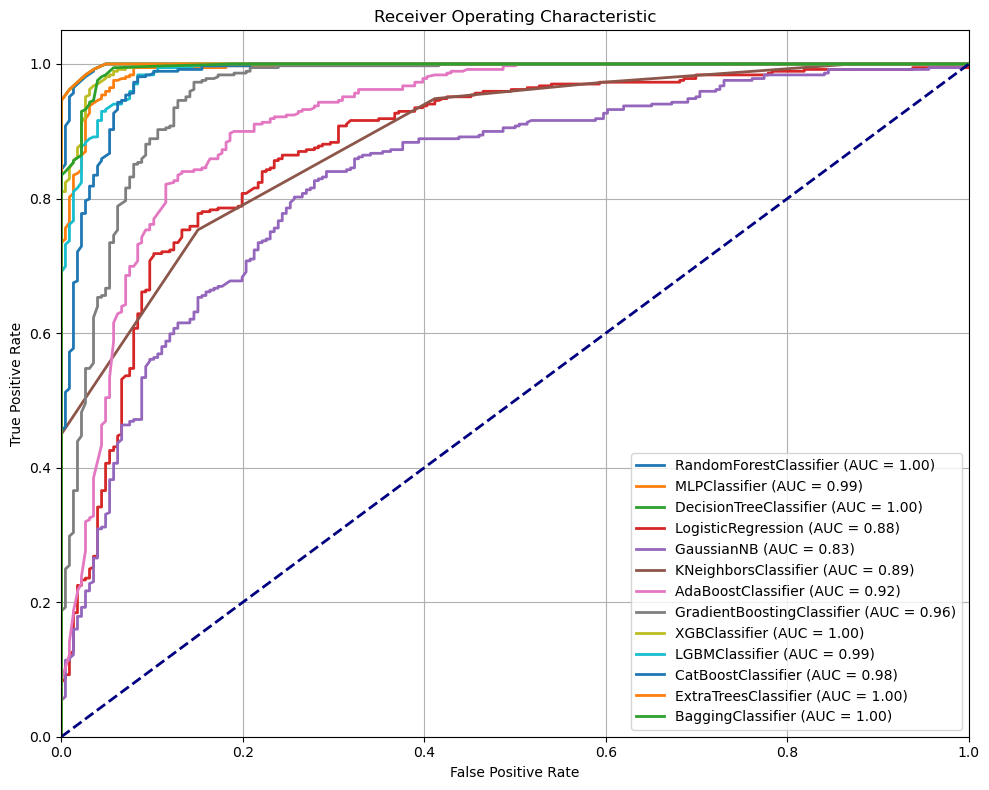

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve for each classifier
def plot_roc_curve(X, y, classifiers):
    plt.figure(figsize=(10, 8))
    for name, classifier in classifiers.items():
        if hasattr(classifier, "predict_proba"):  # Check if the classifier has predict_proba method
            probas = classifier.fit(X, y).predict_proba(X)
            fpr, tpr, thresholds = roc_curve(y, probas[:, 1])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')  # Increased thickness to 2
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Adjust the thickness of the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("roc_curves.pdf", bbox_inches='tight')
    plt.show()

# Plot ROC curves for all classifiers
plot_roc_curve(X, y, classifiers)



In [59]:
for name, classifier in classifiers.items():
    if name in ['RandomForestClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier',
                'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']:
        classifier.fit(X, y)
        if name == 'RandomForestClassifier':
            feature_importance = classifier.named_steps['randomforestclassifier'].feature_importances_
        elif name == 'ExtraTreesClassifier':
            feature_importance = classifier.named_steps['extratreesclassifier'].feature_importances_
        elif name == 'GradientBoostingClassifier':
            feature_importance = classifier.named_steps['gradientboostingclassifier'].feature_importances_
        elif name == 'XGBClassifier':
            feature_importance = classifier.named_steps['xgbclassifier'].feature_importances_
        elif name == 'LGBMClassifier':
            feature_importance = classifier.named_steps['lgbmclassifier'].feature_importances_
        elif name == 'CatBoostClassifier':
            feature_importance = classifier.named_steps['catboostclassifier'].feature_importances_
        
        # Create a dictionary to store feature importance with their column names
        feature_importance_dict = dict(zip(X.columns, feature_importance))
        
        # Sort features by their importance (descending order)
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
        
        print(f"Feature importance for {name} (most important to least important):")
        for column, importance in sorted_feature_importance:
            print(f"{column}: {importance}")
        print('=' * 40)


Feature importance for RandomForestClassifier (most important to least important):
Did you have other bad habits like smoking/drug addiction?: 0.03215944376677043
What was your SSC GPA?: 0.026355393618374287
Where did you stay when preparing for the exam?: 0.025977996183066832
How was your family's economic condition : 0.022023860540704175
Did you involve with any type of relationship?: 0.02117809853973588
Were there any external factors that may have affected your performance on the test (e.g., personal issues, health concerns, financial challenges)?: 0.01797349634146013
How much time did you spend on social media/other activities while preparing for the exam?: 0.016996917601297824
Were you involved in politics while preparing for the exam?: 0.012085721953272009
What was your HSC GPA?: 0.011545907309322812
How was the educational status of your family?: 0.011258130935059486
The average duration of study in a single day during admission preparation-: 0.010424698053801888
Did you stay w

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for MLPClassifier
param_grid_mlp = {
    'mlpclassifier__hidden_layer_sizes': [(128,), (64,), (32,)],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__batch_size': [32, 64],
    'mlpclassifier__max_iter': [500],
    'mlpclassifier__early_stopping': [True],
    'mlpclassifier__n_iter_no_change': [10],
}

# Create a pipeline for preprocessing and MLPClassifier
pipeline_mlp = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    MLPClassifier(random_state=42)
)

grid_search_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

# Get the best parameters
best_params_mlp = grid_search_mlp.best_params_
print(f"Best Parameters for MLPClassifier: {best_params_mlp}")

# Evaluate the MLPClassifier with the best parameters
best_mlp_classifier = grid_search_mlp.best_estimator_
best_mlp_predictions = best_mlp_classifier.predict(X_test)
best_mlp_accuracy = accuracy_score(y_test, best_mlp_predictions)
best_mlp_report = classification_report(y_test, best_mlp_predictions)

print("MLP Classifier:")
print(f"Accuracy: {best_mlp_accuracy:.2f}")
print(f"Classification Report:\n{best_mlp_report}\n{'='*40}")


Best Parameters for MLPClassifier: {'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.01, 'mlpclassifier__batch_size': 32, 'mlpclassifier__early_stopping': True, 'mlpclassifier__hidden_layer_sizes': (128,), 'mlpclassifier__max_iter': 500, 'mlpclassifier__n_iter_no_change': 10}
MLP Classifier:
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.87      0.90      0.88        80

    accuracy                           0.84       119
   macro avg       0.82      0.81      0.82       119
weighted avg       0.84      0.84      0.84       119



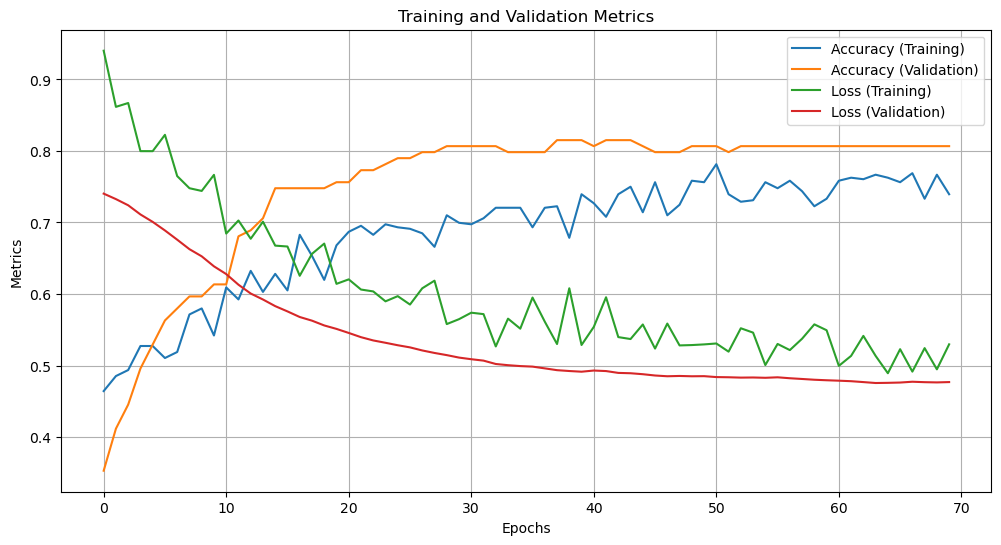

4/4 [==============================] - 0s 2ms/step
For ANN:
Accuracy: 0.8067226890756303
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        39
           1       0.84      0.88      0.86        80

    accuracy                           0.81       119
   macro avg       0.78      0.77      0.78       119
weighted avg       0.80      0.81      0.80       119



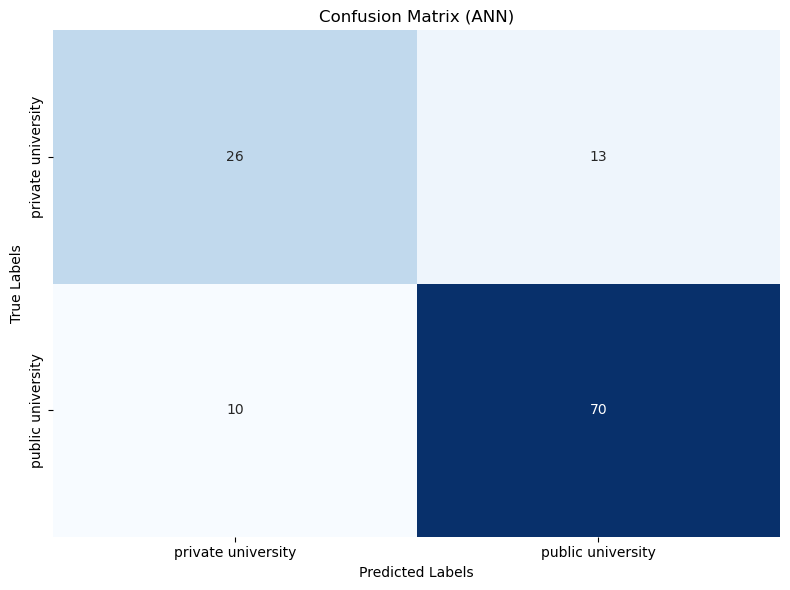

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

# Define a more complex ANN model with Dropout and BatchNormalization
ann_model = Sequential()
ann_model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_model.add(Dropout(0.5))  # Increase dropout rate
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dropout(0.3))  # Add another dropout layer
ann_model.add(Dense(units=1, activation='sigmoid'))

# Implement learning rate scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000,
    decay_rate=0.9
)
ann_model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model and get history
history = ann_model.fit(X_train_scaled, y_train, epochs=70, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=0)

# Visualize accuracy and loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy (Training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Predictions using the ANN
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

# Evaluate the ANN
print('For ANN:')
print('Accuracy:', accuracy_score(y_test, y_pred_ann))
print('Classification Report:')
print(classification_report(y_test, y_pred_ann))

# Plot confusion matrix
class_labels = ['private university', 'public university']
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels)
plt.tight_layout()
plt.savefig("confusion_matrix_ann2.pdf", bbox_inches='tight')  # Save the confusion matrix as a PDF with tight bounding box
plt.show()



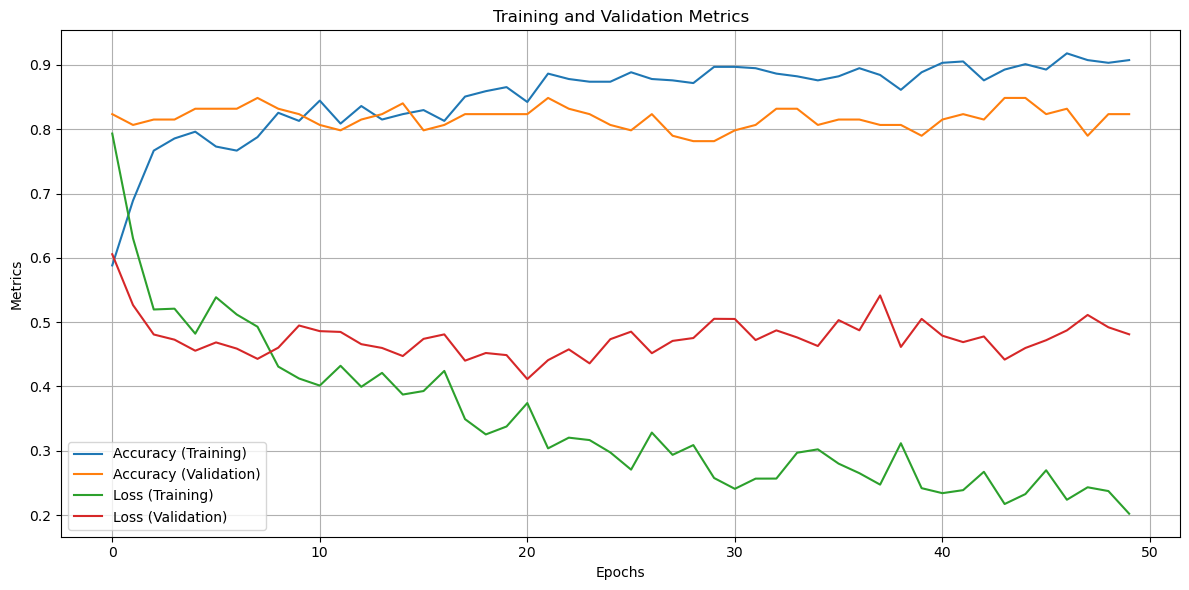

4/4 [==============================] - 0s 2ms/step
For ANN:
Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        39
           1       0.88      0.85      0.87        80

    accuracy                           0.82       119
   macro avg       0.80      0.81      0.80       119
weighted avg       0.83      0.82      0.83       119



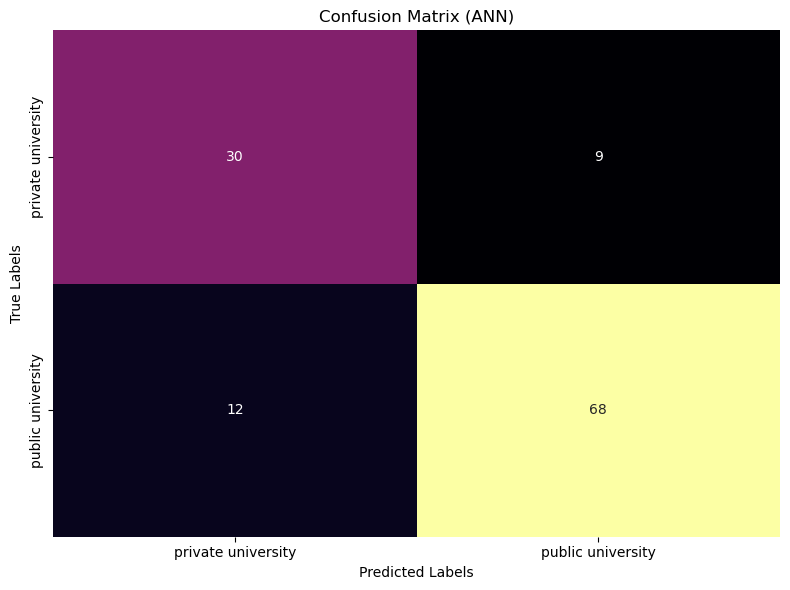

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

# Define a more complex ANN model with Dropout and BatchNormalization
ann_model = Sequential()
ann_model.add(Dense(units=512, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.5))
ann_model.add(Dense(units=256, activation='relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.4))
ann_model.add(Dense(units=128, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(units=1, activation='sigmoid'))

# Implement learning rate scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)
ann_model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model and get history
history = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=0)

# Visualize accuracy and loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy (Training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("train_ann.pdf", bbox_inches='tight')  # Save the confusion matrix as a PDF with tight bounding box
plt.show()


# Predictions using the ANN
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

# Evaluate the ANN
print('For ANN:')
print('Accuracy:', accuracy_score(y_test, y_pred_ann))
print('Classification Report:')
print(classification_report(y_test, y_pred_ann))

# Plot confusion matrix
class_labels = ['private university', 'public university']
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='inferno', cbar=False)
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels)
plt.tight_layout()
plt.savefig("confusion_matrix_ann.pdf", bbox_inches='tight')  # Save the confusion matrix as a PDF with tight bounding box
plt.show()

